In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('movie_dataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,7,7,6.5,R,Benjamin Caron,"1,781",371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka"
4,8,8,6.9,PG-13,Ravi Kapoor,458,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     9911 non-null   int64  
 1   Unnamed: 0       9911 non-null   int64  
 2   IMDb-rating      9911 non-null   float64
 3   appropriate_for  9911 non-null   object 
 4   director         9911 non-null   object 
 5   downloads        9911 non-null   object 
 6   id               9911 non-null   int64  
 7   industry         9911 non-null   object 
 8   language         9911 non-null   object 
 9   posted_date      9911 non-null   object 
 10  release_date     9911 non-null   object 
 11  run_time         9911 non-null   object 
 12  storyline        9911 non-null   object 
 13  title            9911 non-null   object 
 14  views            9911 non-null   object 
 15  writer           9911 non-null   object 
dtypes: float64(1), int64(3), object(12)
memory usage: 1.2+ MB


In [4]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,IMDb-rating,id
count,9911.000000,9911.000000,9911.000000,9911.000000
mean,10860.913631,10860.913631,5.878384,199742.007870
std,5840.341250,5840.341250,1.194902,138454.669024
min,0.000000,0.000000,1.100000,1.000000
25%,6028.500000,6028.500000,5.200000,81607.000000
50%,11281.000000,11281.000000,6.000000,211907.000000
75%,15722.000000,15722.000000,6.600000,340284.500000
max,20540.000000,20540.000000,9.300000,372092.000000


# Numeric Data

In [5]:
df['views'] = pd.to_numeric(df['views'].str.replace(',', ''))
df['downloads'] = pd.to_numeric(df['downloads'].str.replace(',', ''))
df["run_time"] = pd.to_numeric(df["run_time"], errors='coerce')

In [24]:
df['run_time'] = df['run_time'].replace(" hr.", '*60').replace(' min','*1').str.replace(' sec','*0.01').replace(' ','+').apply(eval)




AttributeError: Can only use .str accessor with string values!

In [25]:
numericdata = df[["IMDb-rating","downloads","views","run_time"]]

In [7]:
numericdata.describe()

,IMDb-rating,downloads,views
count,9911.000000,9911.000000,9.911000e+03
mean,5.878384,16140.755928,4.994366e+04
std,1.194902,31007.948619,8.099109e+04
min,1.100000,0.000000,1.002000e+03
25%,5.200000,1335.000000,1.020850e+04
50%,6.000000,4460.000000,2.222700e+04
75%,6.600000,16512.500000,5.394750e+04
max,9.300000,391272.000000,1.638533e+06


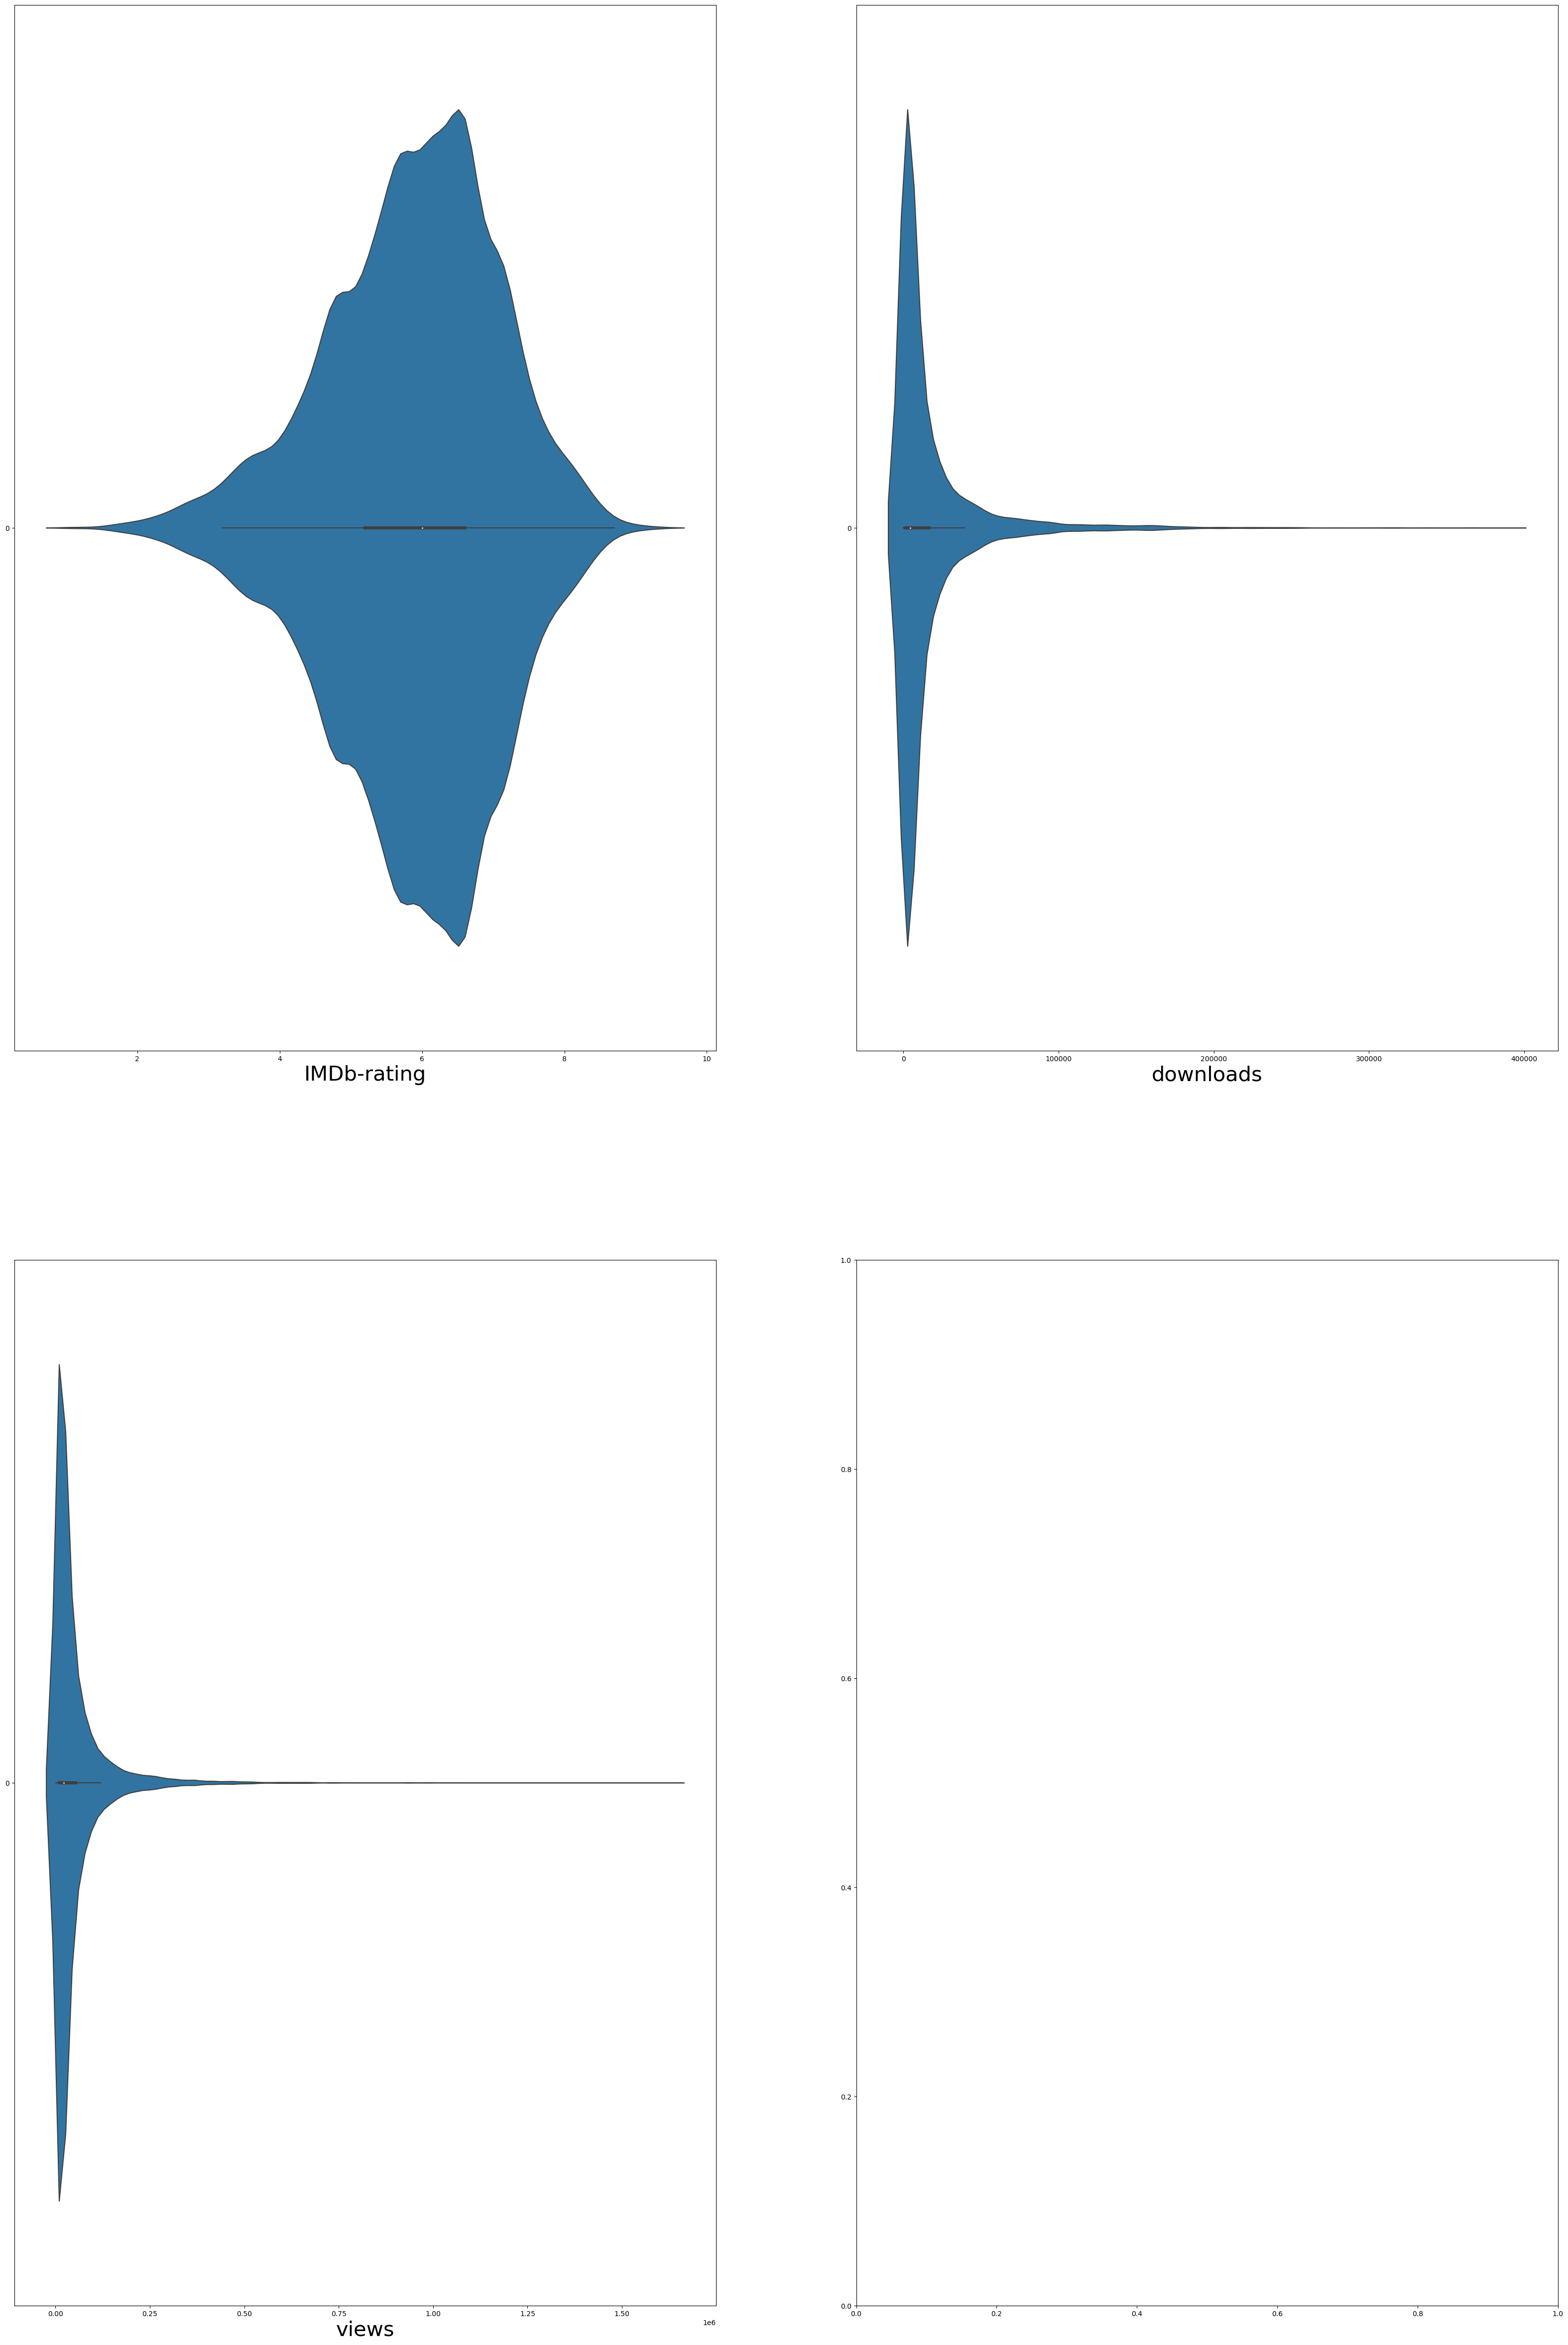

In [8]:
f, axes = plt.subplots(2,2,figsize=(40,60))
count = 0
row = 0
othernumericaldata = [x for x in numericdata.columns]
for var in othernumericaldata:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = numericdata[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

<AxesSubplot:>

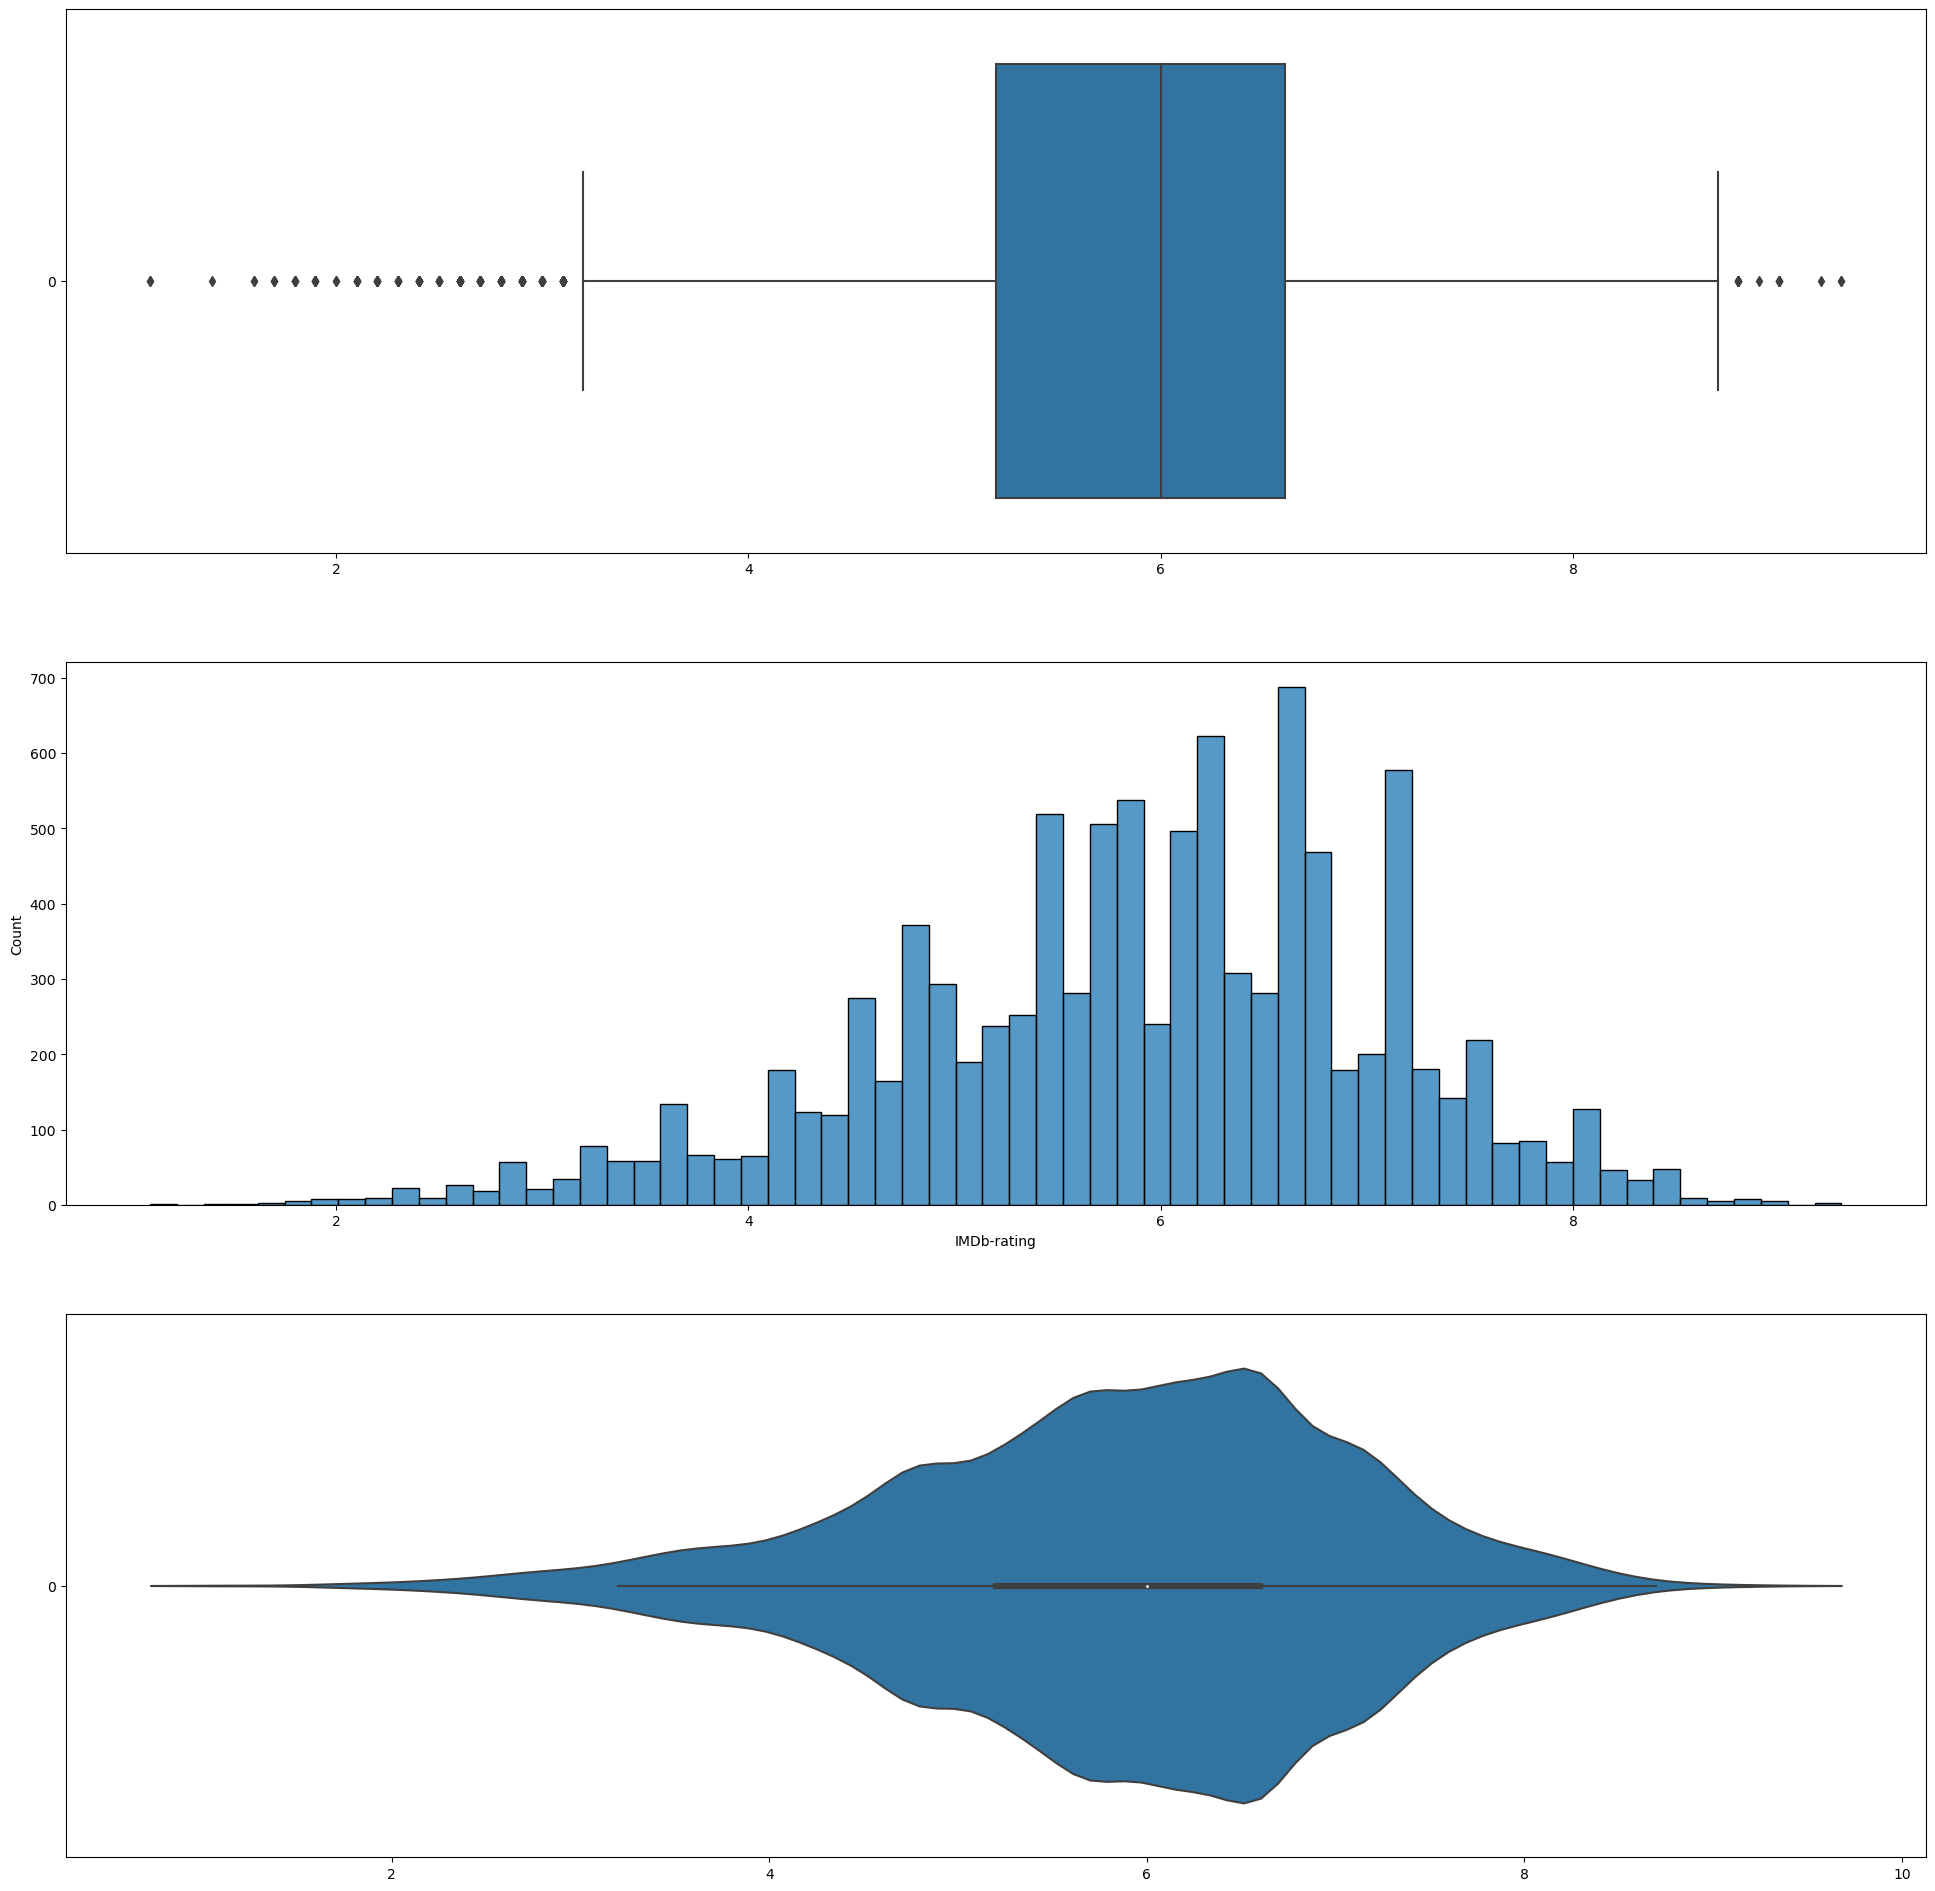

In [9]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = numericdata["IMDb-rating"], orient = "h", ax = axes[0])
sb.histplot(data = numericdata["IMDb-rating"],ax = axes[1])
sb.violinplot(data = numericdata["IMDb-rating"], orient = "h", ax = axes[2])

In [12]:
np.percentile(numericdata["IMDb-rating"],80)

6.9

In [13]:
(numericdata["IMDb-rating"] >= 6.9).value_counts()

False    7903
True     2008
Name: IMDb-rating, dtype: int64

In [14]:
numericdata.corr()

,IMDb-rating,downloads,views
IMDb-rating,1.000000,0.110860,0.109199
downloads,0.110860,1.000000,0.950236
views,0.109199,0.950236,1.000000


<AxesSubplot:>

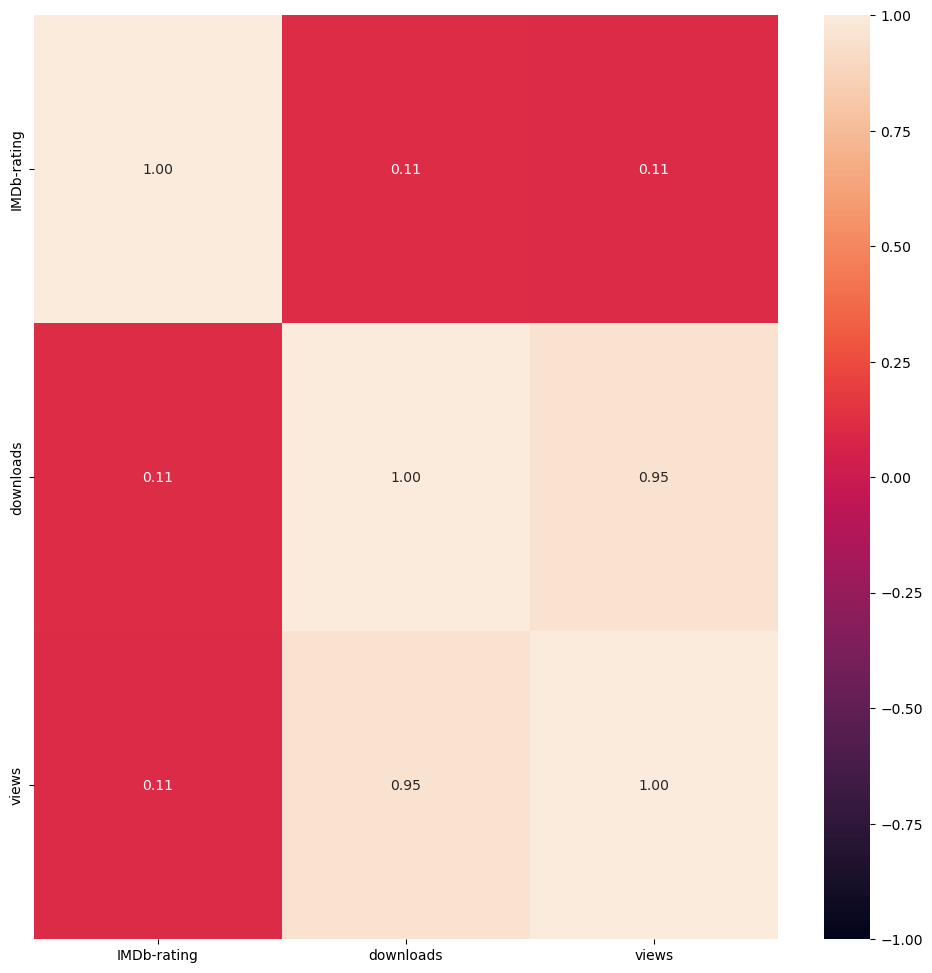

In [15]:
f = plt.figure(figsize=(12,12))
sb.heatmap(numericdata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

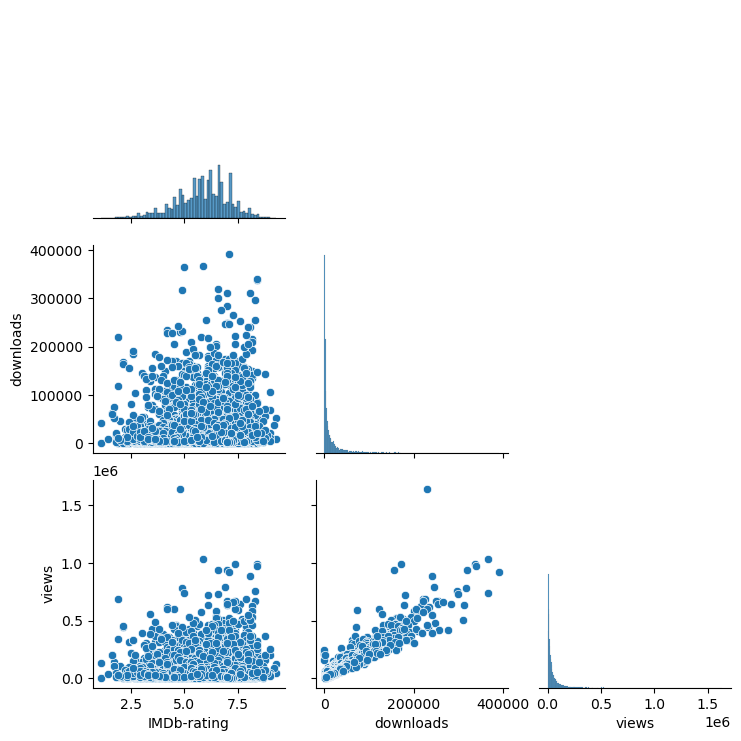

In [16]:
sb.pairplot(data = numericdata, corner = True)

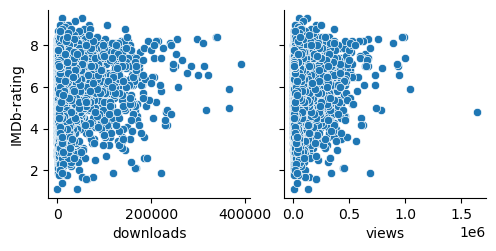

In [17]:
sb.pairplot(data=numericdata,
                  y_vars=['IMDb-rating'],
                  x_vars=['downloads','views','run_time'])